# Wrangle and Analyze Data
### by Vaishnavi Bihare

## Introduction
This project focused on wrangling data from the WeRateDogs Twitter account using Python, documented in a Jupyter Notebook (wrangle_act.ipynb). This Twitter account rates dogs with humorous commentary. The rating denominator is usually 10, however, the numerators are usually greater than 10. They’re Good Dogs Brent wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. WeRateDogs has over 8.7 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.

## About the Data
### Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced.".We manually downloaded this file manually by clicking the following link:[twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

### Data through Twitter API
Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But we, because we have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? We're going to query Twitter's API to gather this valuable data.

### Image Prediction
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) hosted on Udacity's servers and we downloaded it programmatically using python Requests library on the following (URL of the file: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

## Things to keep in mind:
1. We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
2. Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues need to be assessed and cleaned.
3. Cleaning includes merging individual pieces of data according to the rules of tidy data.
4. We do not need to gather the tweets beyond August 1st, 2017. We can, but note that we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.

## Project Details:
Fully assessing and cleaning the entire dataset would require exceptional effort so only a subset of its issues needed to be assessed and cleaned.

The tasks for this project are:

1. Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
2. Storing, analyzing, and visualizing our wrangled data
Reporting on 
1. our data wrangling efforts and 
2. our data analyses and visualizations

In [10]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import os
import requests
import string
import tweepy
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

## Gathering the data
We will obtain data from three sources, a manually downloaded csv file, a programmatically downloaded tsv file and data scraped from the Twitter API.

### Twitter Archive

In [11]:
df= pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Image Prediction

In [13]:
# Use requests library to download tsv file
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)
with open ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_pred=pd.read_csv('image_predictions.tsv', sep='\t')

In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


### Data via Twitter API

Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file.

In [15]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [17]:
import time
#list of errors
error = []
# List of tweets
df_list = []
# Calculating the time of execution
start = time.time()

#loop through the avilable tweet json to convert it itno a dataframe
for tweet_id in df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] 
        retweets = tweet['retweet_count']
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] 
        date_time = tweet['created_at'] 
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error.append(tweet_id)
# Calculating the time of excution
end = time.time()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 360


829374341691346946 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
812747805718642688 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
779123168116150273 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
771004394259247104 _ [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
770743923962707968 _ [{'code': 144, 'message': 'No status found with that ID.'}]
759566828574212096 _ [{'code': 144, 'message': 'No status found with that ID.'}]
754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 631


680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 699


2319.795304298401


In [18]:
# lengh of the result
print("The lengh of the result", len(df_list))
# The tweet_id of the errors
print("The lengh of the errors", len(error))

The lengh of the result 2331
The lengh of the errors 25


From the above results:

1. We reached the limit of the tweepy API three times but wait_on_rate_limit automatically wait for rate limits to re-establish and wait_on_rate_limit_notify print a notification when Tweepy is waiting.
2. We could get 2331 tweet_id correctly with 25 errors
3. The total time was about 2319.80 seconds (~ 39 min)

In [19]:
print("The length of the result", len(df_list))

The length of the result 2331


In [20]:
# Create DataFrames from list of dictionaries
jsontweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
jsontweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [21]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35936,7632,8796097,145904,2017-08-01 16:23:56+00:00
1,892177421306343426,31008,5642,8796097,145904,2017-08-01 00:17:27+00:00
2,891815181378084864,23329,3740,8796097,145904,2017-07-31 00:18:03+00:00
3,891689557279858688,39230,7804,8795415,145902,2017-07-30 15:58:51+00:00
4,891327558926688256,37450,8397,8796097,145904,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2326,666049248165822465,96,40,8796178,145903,2015-11-16 00:24:50+00:00
2327,666044226329800704,269,130,8796178,145903,2015-11-16 00:04:52+00:00
2328,666033412701032449,111,41,8796178,145903,2015-11-15 23:21:54+00:00
2329,666029285002620928,120,42,8796178,145903,2015-11-15 23:05:30+00:00


In [22]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(5), object(1)
memory usage: 100.2+ KB


## Gather Summary:
Gathering is the first step in the data wrangling process.

1. Obtaining data
    - Getting data from an existing file (twitter-archive-enhanced.csv) Reading from csv file using pandas
    - Downloading a file from the internet (image-predictions.tsv) Downloading file using requests
    - Querying an API (tweet_json.txt) Get JSON object of all the tweet_ids using Tweepy
2. Importing that data into our programming environment (Jupyter Notebook)

# Assessing the Data

## Twitter archive table

In [24]:
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [25]:
# Let's count the number of not None values in columns 'doggo' and 'puppo'
(df.loc[:, 'doggo': 'puppo']!= 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [26]:
# Counting the number of cells of `text` with doggo, floofer, pupper, and puppo
for column in df.columns[-4:]:
    print(column, df.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [38]:
# Checking if name is always captured
df[['text', 'name']].sample(10)

,text,name
1994,This is a baby Rand Paul. Curls for days. 11/1...,a
1850,Here's a pupper licking in slow motion. 12/10 ...,None
1784,In honor of the new Star Wars movie. Here's Yo...,None
1089,This is Bella. She's ubering home after a few ...,Bella
1343,This pupper killed this great white in an epic...,None
1983,This is Terry. He's a Toasty Western Sriracha....,Terry
2153,This is a brave dog. Excellent free climber. T...,a
141,We only rate dogs. Please don't send in Jesus....,None
1103,This is Kellogg. He accidentally opened the fr...,Kellogg
1173,This is Derek. He just got balled on. Can't ev...,Derek


In [40]:
# Identify example of missing name
df.text[1784]

"In honor of the new Star Wars movie. Here's Yoda pug. 12/10 pet really well, would I https://t.co/pvjdRn00XH"

In [44]:
df.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
space        1
Todo         1
Skittle      1
Mauve        1
Petrick      1
Name: name, Length: 957, dtype: int64

In [45]:
df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [48]:
df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

## Image prediction table

In [49]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [50]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [55]:
image_pred.info()
image_pred['jpg_url'].value_counts()
image_pred[image_pred['jpg_url'] == 'https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22577,True,German_short-haired_pointer,0.175219,True


In [56]:
# Viewing the number of entries for each source
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Twitter data collected via API

In [58]:
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35936,7632,8796097,145904,2017-08-01 16:23:56+00:00
1,892177421306343426,31008,5642,8796097,145904,2017-08-01 00:17:27+00:00
2,891815181378084864,23329,3740,8796097,145904,2017-07-31 00:18:03+00:00
3,891689557279858688,39230,7804,8795415,145902,2017-07-30 15:58:51+00:00
4,891327558926688256,37450,8397,8796097,145904,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2326,666049248165822465,96,40,8796178,145903,2015-11-16 00:24:50+00:00
2327,666044226329800704,269,130,8796178,145903,2015-11-16 00:04:52+00:00
2328,666033412701032449,111,41,8796178,145903,2015-11-15 23:21:54+00:00
2329,666029285002620928,120,42,8796178,145903,2015-11-15 23:05:30+00:00


In [59]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(5), object(1)
memory usage: 100.2+ KB


## Data Inclusion Criteria
We are expected to use the following criteria to select the data:

- Do not include retweets
- Only tweets that have images

Note: The archive also has reply tweets which in general contain upgraded/downgraded ratings of the dog. This means that in some cases there are two observations/ratings for the same dog. As a result, I decided to only include original ratings and so developed an additional criteria:

- Do not include replies

## Findings

### Quality

#### Twitter Archive Table(df)
- Retweets are included in the dataset
- Replies are included in the dataset
- Erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo columns)
- Missing info in expanded_urls
- Nulls represented as "None" (str) for name, doggo, floofer, pupper, and puppo columns
- Missing counts for doggo, floofer, pupper and puppo
- Missing names identified from text in name e.g. index 1852 - Reggie
- Some names identified are not names
- text column includes both text and short version of link
- Some extracted values for rating_numerator and rating_denominator seem to be in error

#### Image Prediction table (image_pred)
- Erroneous datatype (tweet_id)
- The lower number of entries means that some posts don't have images

#### Twitter API data table (tweet_data)
- Erroneous datatype (tweet_id)
- Retweet and favorite information is not available for all tweets and cannot be retrieved

### Tidiness

#### Twitter Archive table(df)
- There are multiple columns containing the same type of data, e.g. doggo, floofer, pupper and puppo all contain dog types

#### Image predictions table(image_pred)
- There are multiple columns containing the same type of data, e.g. p1, p2, p3 all contain dog breed predictions

#### Twitter API data table(tweet_data)
- This data is separate from the other tweet data

## Cleaning the data

In [61]:
df_clean= df.copy()
image_clean= image_pred.copy()
tweet_clean= tweet_data.copy()

### Missing Data
There are four main areas of missing data identified:

- Missing info in expanded_urls
- Missing counts for doggo, floofer, pupper and puppo
- Missing names identified from text in name e.g. index 1852 - Reggie

I am not concerned about tracking down the missing url information because I don't plan to analyze it.

**Missing counts for doggo, floofer, pupper and puppo in archive table**

The issue of "Nulls" represented as "None" (str) for doggo, floofer, pupper, and puppo columns is also able to be addressed here.

#### Define

Using for loop and .str.contains() to re-identify if text contains each column header. Include text if it is found. If not, return NaN.

#### Code

In [62]:
dog_type = list(df_clean.iloc[:,-4:])
dog_type

['doggo', 'floofer', 'pupper', 'puppo']

In [63]:
def find_type(df, dog):
    dog_list = []
    for row in df['text']:
        if dog in row:
            dog_list.append(dog)
        else:
            dog_list.append(np.NaN)
    return dog_list

In [64]:
for dog in dog_type:
    df_clean[dog] = find_type(df, dog)

#### Test

In [67]:
# Check non-null data counts for columns
df_clean[dog_type].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      98 non-null object
floofer    4 non-null object
pupper     272 non-null object
puppo      37 non-null object
dtypes: object(4)
memory usage: 36.9+ KB


In [68]:
# Compare to counts from text
for dog in dog_type:
    print(dog, df_clean.text.str.contains(dog).sum())

doggo 98
floofer 4
pupper 272
puppo 37


The counts of what is found in the text strings matches what is found in the columns.

**Missing names identified from text in name in archive table**
 The issues of Some names identified are not names and Nulls represented as "None" (str) for name can also be addressed here.

This would also be the place to address Second name missing if two are mentioned however I decided that this was too difficult for me to do.

#### Define
Create function to identify pet names and re-populate name column

#### Code
Pet names are capitalized, usually less than 10 characters but at least 2, and typically found before the first period. They typically only include letters and apostrophes and certain words are not usually used as pet names.

In [69]:
def find_names(df):
    name = []
    for row in df['text']:
        # Find first "."
        first_period = row.find(".")
        # If no period is found, assume there is no name
        if first_period == -1:
            name.append(np.NaN)
        else:
            # Find word before period
            word_before = row[:first_period].rsplit(' ', 1)[-1]
            # Check if word is capitalized
            if word_before == word_before.title():
                # Add exclusionary criteria - not more than 10 letters, not less than 2 letters, not in other_words, only alphanumeric
                other_words = ["This", "Xbox", "Oh", "Christmas", "Up", "Pupper", "Doggo", "Puppo", "Floofer"]
                if (len(word_before) > 10) or any(word in word_before for word in other_words) or any(c for c in word_before if c not in string.ascii_letters + "'") or (len(word_before) < 2):
                    name.append(np.NaN)
                else:
                    name.append(word_before)
            else:
                name.append(np.NaN)
        
    return name

In [70]:
name = find_names(df_clean)
df_clean.name = name

**Resources used**
1. [Finding String Before](https://www.dotnetperls.com/between-before-after-python)
2. [Checking for apostrophes](https://stackoverflow.com/questions/33790790/how-to-check-if-a-string-contains-letters-or-letters-and-an-apostrophe-but-no-nu)
3. [Checking if list elements are of type "String"](https://stackoverflow.com/questions/6531482/how-to-check-if-a-string-contains-an-element-from-a-list-in-python)

#### Test

In [71]:
df_clean.name.head(10)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5         NaN
6         Jax
7         NaN
8        Zoey
9      Cassie
Name: name, dtype: object

In [72]:
df_clean.name.value_counts()

Charlie       14
Oliver        12
Cooper        11
Tucker        10
Lucy          10
              ..
Guss           1
Chesterson     1
Rupert         1
Flakes         1
Kreggory       1
Name: name, Length: 961, dtype: int64

In [75]:
# Visually compare sample of results
df_clean[['text', 'name']].sample(10)

,text,name
223,This is Noosh. He noticed you were in the show...,Noosh
1221,This is Blitz. He screams. 10/10 (vid by @yeaa...,Blitz
1278,This is Lucy. She doesn't understand fetch. 8/...,Lucy
806,This is Penny. She's an OU cheerleader. About ...,Penny
445,This is Finn. He's wondering if you come here ...,Finn
1872,This is Coops. He's yelling at the carpet. Not...,Coops
301,Say hello to Oliver. He's pretty exotic. Fairl...,Oliver
2180,Meet Terrance. He's being yelled at because he...,Terrance
2020,This is Tuco. That's the toast that killed his...,Tuco
1457,This is just a beautiful pupper good shit evol...,NaN


### Tidy Data
The next step is to address tidiness issues. Three were identified:

1. There are multiple columns containing the same type of data in the archive table, e.g. doggo, floofer, pupper, puppo
2. There are multiple columns containing the same type of data in the predictions table, e.g. p1, p2, p3 all contain dog breed predictions
3. The tweet data in the api_data table is separate from the other tweet data

**Multiple columns containing the same type of data in the "Twitter Archive" table**

There is a small amount of overlap, but I would rather the posts be classified once.

#### Define
Create a column called dog_type and merge all data in order of puppo, pupper, floofer, doggo using .fillna(). Drop the redundant columns.

#### Code

In [76]:
df_clean['dog_type'] = df_clean.puppo.fillna(df_clean.pupper.fillna(df_clean.floofer.fillna(df_clean.doggo)))

In [77]:
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [78]:
# Confirming NaNs remain
df_clean.dog_type.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: dog_type, dtype: object

In [79]:
# Checking the dog_type counts
df_clean.dog_type.value_counts()

pupper     272
doggo       86
puppo       37
floofer      4
Name: dog_type, dtype: int64

In [81]:
# Confirming column drop
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type'],
      dtype='object')

**Multiple columns containing the same type of data in the predictions table**

#### Define
Change the columns names for ease of use with pd.wide_to_long. Use pd.wide_to_long to

- melt p1_conf, p2_conf, p3_conf to a confidence column
- melt p1, p2, p3 to a prediction column
- melt p1_dog, p2_dog, p3_dog to a dog column.

#### Code

In [83]:
# Change column names
col_names = ['tweet_id', 'jpg_url', 'img_num', 
             'prediction_1', 'confidence_1', 'dog_1', 
             'prediction_2', 'confidence_2', 'dog_2', 
             'prediction_3', 'confidence_3', 'dog_3']
image_clean.columns = col_names

In [84]:
# Converting wide to long
image_clean = pd.wide_to_long(image_clean, 
                                    stubnames=['prediction', 'confidence', 'dog'],
                      i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_order', sep='_')\
.reset_index()

#### Test

In [85]:
#Let's test if it worked or not
image_clean.head(10)

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True


In [86]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_order    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
dog                 6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 249.3+ KB


In [88]:
# Compare count to original counts
6225/2075

3.0

**Given that there are three predictions for each, it is expected that the length would increase by three times. This is what has occurred.**

#### Resources used:

[Multiple column melt](https://stackoverflow.com/questions/38862832/pandas-melt-several-groups-of-columns-into-multiple-target-columns-by-name)

**Tweet data in the "tweet_data" table is separate from the other tweet data**

#### Define
Merge the data from "tweet_data" table with the "df"(twitter archive) table

#### Code

In [90]:
df_clean = pd.merge(left=df_clean, right=tweet_clean, how='left', on='tweet_id')

#### Test

In [91]:
df_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,35936.0,7632.0,8796097.0,145904.0,2017-08-01 16:23:56+00:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,31008.0,5642.0,8796097.0,145904.0,2017-08-01 00:17:27+00:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,23329.0,3740.0,8796097.0,145904.0,2017-07-31 00:18:03+00:00
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,39230.0,7804.0,8795415.0,145902.0,2017-07-30 15:58:51+00:00
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,37450.0,8397.0,8796097.0,145904.0,2017-07-29 16:00:24+00:00
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,18876.0,2815.0,8796097.0,145904.0,2017-07-29 00:08:17+00:00
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,10967.0,1835.0,8796097.0,145904.0,2017-07-28 16:27:12+00:00
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,60526.0,17039.0,8796097.0,145904.0,2017-07-28 00:22:40+00:00
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,25972.0,3880.0,8796097.0,145904.0,2017-07-27 16:25:51+00:00
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,29668.0,6635.0,8796097.0,145904.0,2017-07-26 15:59:51+00:00


In [92]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1531 non-null object
dog_type                      399 non-null object
favorites                     2331 non-null float64
retweets                      2331 non-null float64
user_followers                2331 non-null float64
user_favourites               

### Data Quality

Some posts don't have images

#### Define
Remove any tweet ids in the archive table that aren't in the image_pred table.

#### Code

In [93]:
# Confirming the number to be removed
no_image = (~df_clean.tweet_id.isin(list(image_clean.tweet_id)))
no_image.sum()

281

In [94]:
# Removing non-shared tweet_id's
df_clean = df_clean[~no_image]

#### Test

In [95]:
# Confirm no tweet_id's without images
(~df_clean.tweet_id.isin(list(image_clean.tweet_id))).sum()

0

In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          1422 non-null object
dog_type                      338 non-null object
favorites                     2059 non-null float64
retweets                      2059 non-null float64
user_followers                2059 non-null float64
user_favourites               205

**Replies and retweets are included in archive table**

#### Define
1. Identify rows that have info for in_reply_to_status_id or retweeted_status_id and remove from df_clean.
2. Remove redundant columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).
3. Remove non-shared id's from image_clean

#### Code

In [97]:
# Check rows to remove for replies
reply = (~df_clean.in_reply_to_status_id.isnull())
reply.sum()

23

In [98]:
# Remove replies
df_clean = df_clean[~reply]

In [99]:
# Checking rows to remove for retweets
retweet = (~df_clean.retweeted_status_user_id.isnull())
retweet.sum()

81

In [100]:
# Remove retweet
df_clean = df_clean[~retweet]

In [101]:
df_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

In [102]:
# Identify tweet_ids in image prediction not in df
not_share = (~image_clean.tweet_id.isin(list(df_clean.tweet_id)))
not_share.sum()

312

In [103]:
image_clean = image_clean[~not_share]

#### Test

In [105]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1367 non-null object
dog_type              322 non-null object
favorites             1964 non-null float64
retweets              1964 non-null float64
user_followers        1964 non-null float64
user_favourites       1964 non-null float64
date_time             1964 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 177.1+ KB


In [106]:
# Confirming no unshared image_clean tweet_id's with df_clean
(~image_clean.tweet_id.isin(list(df_clean.tweet_id))).sum()

0

**text column in archive contains both text and short link**
#### Define

Create a function to remove links and apply it to df_clean.text.

#### Code

In [107]:
def link_removal(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x

In [108]:
df_clean.text = df_clean.text.apply(link_removal_removal)

#### Test

In [109]:
# Print full text to check the endings of our tweet
for tweet in df_clean.text[:5]:
    print(tweet)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


**Values for rating_numerator are incorrect**
#### Define

- Creating a function that identifies the value before the last/ in the text and uses this in the rating_numerator column. - 
- Manually correct any ratings that are not covered by the function.

#### Code

In [110]:
def finding_numerator(x):
    # Ratings are associated with the last "/"
    slash = x.rfind("/")
    try:
        if x[slash - 2] == ".":
            numerator = x[slash - 4:slash].strip()
            if numerator[0] == ".":
                numerator = numerator.strip("...").strip("..")
        else:
            numerator = x[slash - 2:slash].strip().strip("(")
        return float(numerator)
    
    except ValueError:
        return np.NaN

In [111]:
df_clean.rating_numerator = df_clean.text.apply(finding_numerator)

In [112]:
# Identify strange formatting
numerator_missing = list(df_clean[df_clean.rating_numerator.isnull()].index)
numerator_missing

[2216, 2246]

In [113]:
# Check full text for each
for i in numerator_missing:
    print(i, df_clean.text[i])

2216 This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10
2246 This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10


The below indexes contains two ratings and one is a humerous expression related to the picture. I'm going to go with 8 and 10

In [114]:
df_clean.at[numerator_missing[0], 'rating_numerator'] = 8
df_clean.at[numerator_missing[1], 'rating_numerator'] = 10

#### Test

In [115]:
# Check all values are filled
df_clean.rating_numerator.isnull().sum()

0

In [116]:
# Check range of values
df_clean.rating_numerator.describe()

count    1971.000000
mean       10.893709
std         5.103397
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        99.000000
Name: rating_numerator, dtype: float64

**Values for rating_denominator are incorrect**

#### Define
Create a function that identifies the value after the last / in the text and uses this in the rating_denominator column.

#### Code

In [119]:
def finding_denominator(x):
    # Ratings are associated with the last "/"
    slash = x.rfind("/")
    try:
        denominator = x[slash + 1:slash + 3]
        return float(denominator)
   
    except ValueError:
        return np.NaN

In [120]:
df_clean.rating_denominator = df_clean.text.apply(finding_denominator)

#### Test

In [121]:
# Checking all values are filled
df_clean.rating_denominator.isnull().sum()

0

In [122]:
df_clean.rating_denominator.describe()

count    1971.000000
mean       10.203957
std         3.483537
min         7.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        90.000000
Name: rating_denominator, dtype: float64

Most denominators are expected to be 10.

#### Erroneous datatypes
By melting the image_clean table, an additional erroneous data type was created in the prediction_order column.
With the collapse of the columns in archive table to a single dog_type column, an additional erroneous data type was created in the column.

#### Define
df_clean table:
- tweet_id: change to str
- timestamp: change to datetime
- dog_type: categorical

image_clean table:
- tweet_id: change to str
- prediction_order: changet to categorical

#### Code

In [123]:
# Changing tweet_id's
df_clean.tweet_id = df_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)

In [124]:
# Changing timestamp
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

In [125]:
# Change dog_type and prediction order
df_clean.dog_type = df_clean.dog_type.astype("category")
image_clean.prediction_order = image_clean.prediction_order.astype("category")

#### Test

In [126]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns, UTC]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1367 non-null object
dog_type              322 non-null category
favorites             1964 non-null float64
retweets              1964 non-null float64
user_followers        1964 non-null float64
user_favourites       1964 non-null float64
date_time             1964 non-null object
dtypes: category(1), datetime64[ns, UTC](1), float64(6), object(6)
memory usage: 235.4+ KB


In [127]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            5913 non-null object
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_order    5913 non-null category
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(3)
memory usage: 219.5+ KB


### Saving the clean data into CSV

In [128]:
df_clean.to_csv('twitter_archive_clean.csv', index=False)
image_clean.to_csv('predictions_clean.csv', index=False)

# Analyzing and Visualizing

In [129]:
tweet = pd.read_csv('twitter_archive_clean.csv')
pred = pd.read_csv('predictions_clean.csv')

In [130]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 14 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1367 non-null object
dog_type              322 non-null object
favorites             1964 non-null float64
retweets              1964 non-null float64
user_followers        1964 non-null float64
user_favourites       1964 non-null float64
date_time             1964 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 161.7+ KB


In [131]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null int64
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_order    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 236.8+ KB


The datatypes have been altered as we are reading the data from csv again, hence we need to perform the data conversion again

In [132]:
# Change types
tweet.tweet_id = tweet.tweet_id.astype(str)
pred.tweet_id = pred.tweet_id.astype(str)
tweet.dog_type = tweet.dog_type.astype("category")
pred.prediction_order = pred.prediction_order.astype("category")
tweet.timestamp = pd.to_datetime(tweet.timestamp)

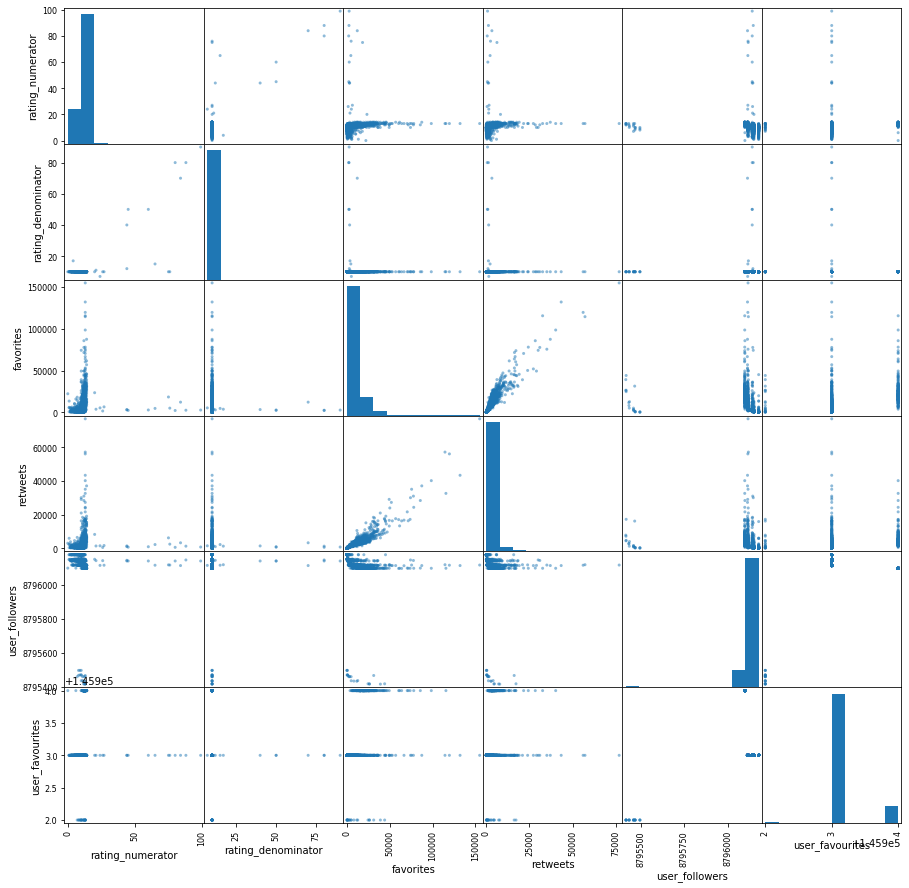

In [133]:
pd.plotting.scatter_matrix(tweet.iloc[:, 1:], figsize=(15, 15));

## Retweets Count

In [142]:
tweet.retweets.describe()

count     1964.000000
mean      2449.334521
std       4375.337043
min         11.000000
25%        544.000000
50%       1185.500000
75%       2799.750000
max      77034.000000
Name: retweets, dtype: float64

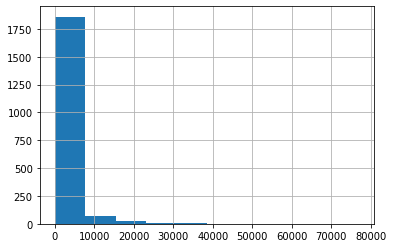

In [144]:
tweet.retweets.hist();

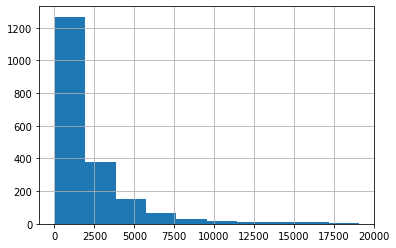

In [145]:
tweet[tweet.retweets <= 20000].retweets.hist();

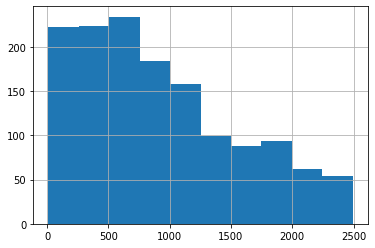

In [146]:
tweet[tweet.retweets <= 2500].retweets.hist();

## Favorites Count

In [148]:
tweet.favorites.describe()

count      1964.000000
mean       8262.492872
std       12144.651535
min          70.000000
25%        1774.250000
50%        3736.000000
75%       10314.000000
max      154981.000000
Name: favorites, dtype: float64

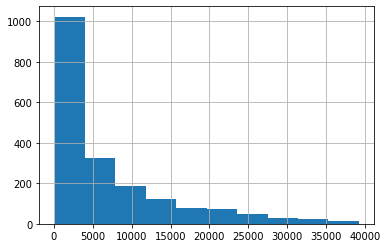

In [149]:
tweet[tweet.favorites <= 40000].favorites.hist();

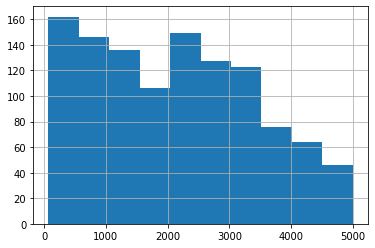

In [151]:
tweet[tweet.favorites <= 5000].favorites.hist();

## Popular Names

In [152]:
tweet.name.value_counts().head(10)

Charlie    13
Oliver     11
Cooper     10
Tucker      9
Lucy        9
Penny       8
Daisy       8
Winston     8
Lola        7
Bella       6
Name: name, dtype: int64

**We are gone with wrangling the data. In this module we did the folloring steps:**
#### 1. Collected the data from web
#### 2. Gathered the data using an API(Twitter API using tweepy)
#### 3. Assessed the data, and noted down the required changes to be done, so as to make the data clean.
#### 4. Cleaned the data

### Let's now move forward to analyze and visualize the data in detail

Here we have understood the basic variation in data using histograms, we will some advance plots in **act_report**